In [3]:
import shap
import mlflow

from sklearn.model_selection import train_test_split
from src.data_loading import fetch_data, transform_data


df = fetch_data()
df = transform_data(df)
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = mlflow.sklearn.load_model("runs:/a0c71a888e4b4d7eba77d9a08c234522/model") 

explainer = shap.TreeExplainer(model)


shap_values = explainer.shap_values(X_test)

print(shap_values)

[[ 1.62558863e+00  2.77744373e-01 -1.18331952e-01 ... -1.20758345e-02
   2.54808326e-01  1.43514610e-01]
 [-3.63946402e-02  3.30083615e-02 -4.48352496e-02 ...  2.51610397e-01
  -6.42853217e-01  2.12562236e-01]
 [-5.70485265e-02 -1.89068692e-02  5.02698305e-02 ...  2.52926889e-01
   5.72389037e-02  1.33201456e-01]
 ...
 [-3.22839992e-01 -2.74856703e-02  2.94308097e-04 ... -2.69650822e-01
   2.12734284e-01  1.42684655e-01]
 [ 1.50117259e-01  1.51401086e-02  1.10490592e-06 ... -2.41952795e-01
   1.58608725e-01 -7.90834748e-02]
 [-7.32578460e-01  4.07440013e-02 -1.21817288e-01 ...  1.12668262e-01
  -4.49873775e-02  1.15221501e-01]]


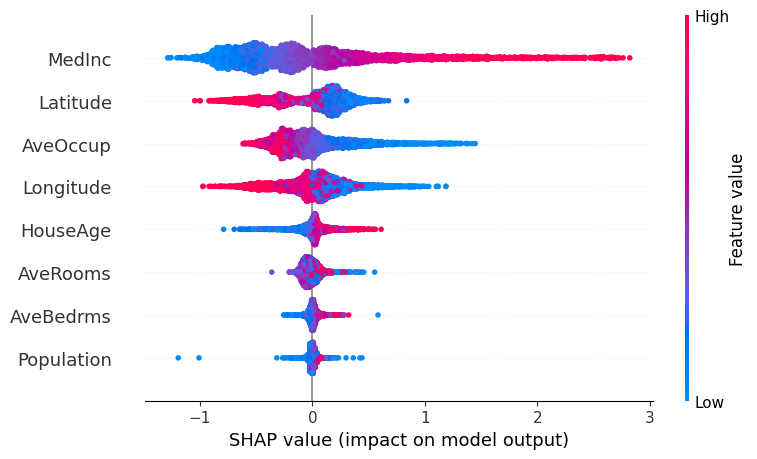

In [10]:
shap.summary_plot(shap_values, X_test)

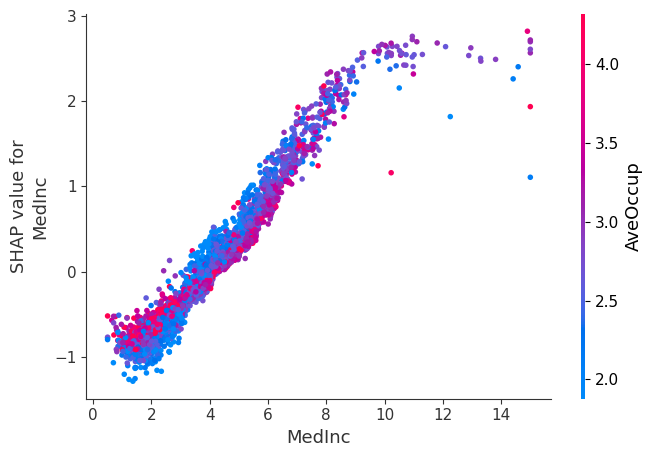

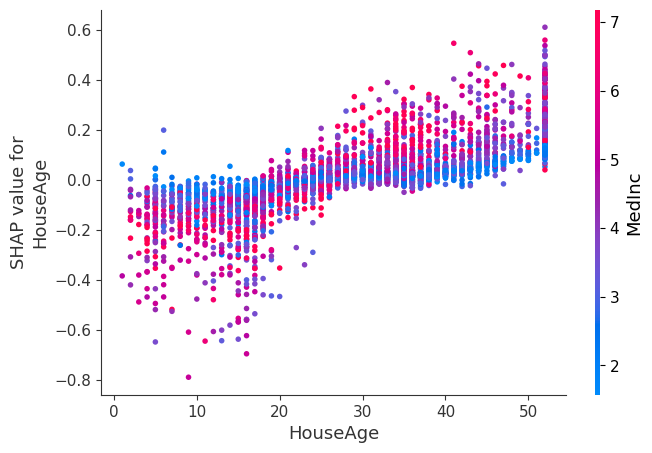

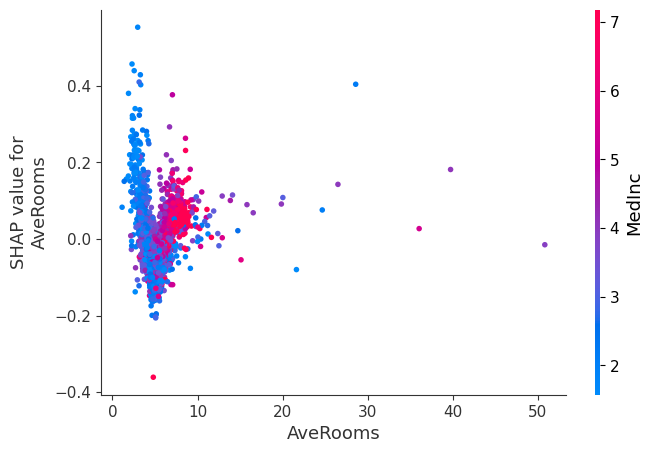

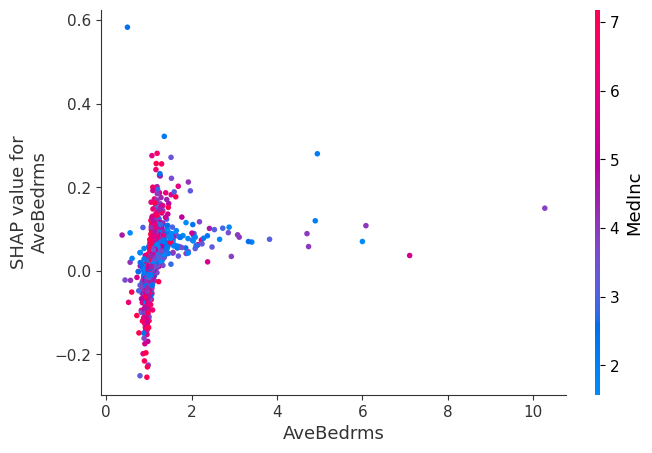

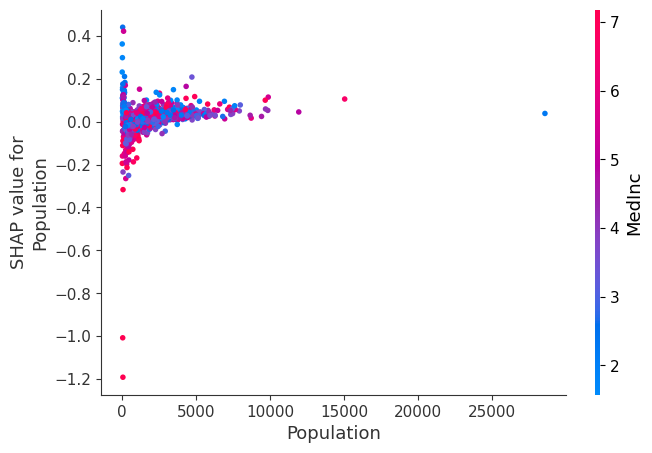

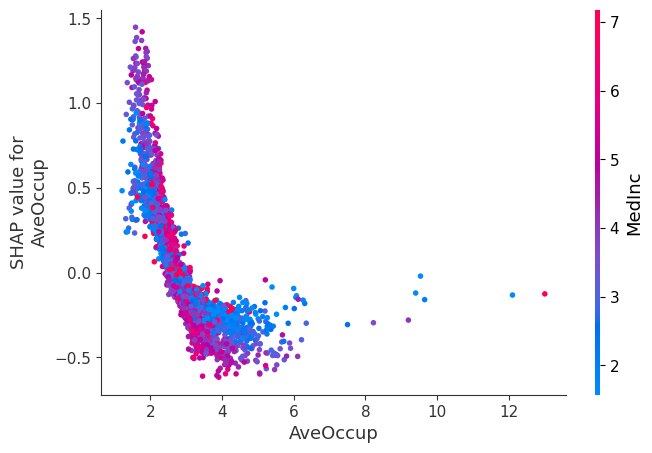

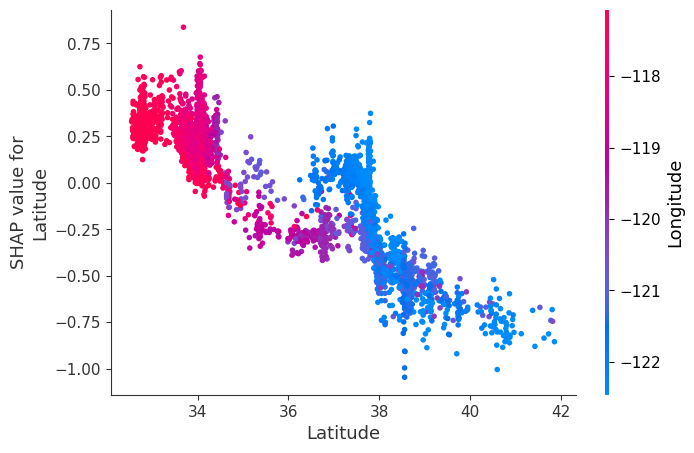

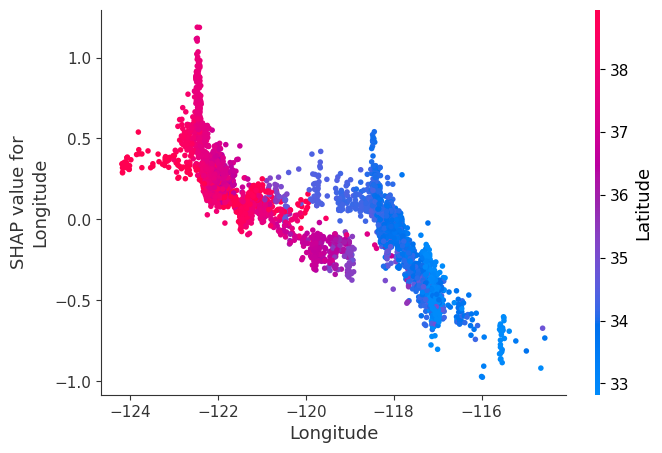

In [9]:
for var in ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']:
    shap.dependence_plot(var, shap_values, X_test)

In [ ]:
#for i in X_test:
#    shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices